In [1]:
import pandas as pd
file_path = '/mnt/c/Users/KDT21/Desktop/DM/diabetes.csv'
diabetes_df = pd.read_csv(file_path)

In [2]:
col_to_drop = 'Insulin'
non_ins_df = diabetes_df.drop(columns=[col_to_drop], axis=1)
print(non_ins_df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   31.992578   
std       3.369578   31.972618      19.355807      15.952218    7.884160   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000   27.300000   
50%       3.000000  117.000000      72.000000      23.000000   32.000000   
75%       6.000000  140.250000      80.000000      32.000000   36.600000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.

In [3]:
import numpy as np
import pandas as pd

nan_df = non_ins_df.copy()
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
nan_df[cols_to_replace] = nan_df[cols_to_replace].replace(0, np.nan)

dropped_df = nan_df.dropna(how='any')

print("--- NaN 포함 행 삭제 후 데이터셋 크기 ---")
print(dropped_df.shape)

print("\n--- 삭제 후 기술 통계량 (min 값 확인) ---")
print(dropped_df.describe())

--- NaN 포함 행 삭제 후 데이터셋 크기 ---
(532, 8)

--- 삭제 후 기술 통계량 (min 값 확인) ---
       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   532.000000  532.000000     532.000000     532.000000  532.000000   
mean      3.516917  121.030075      71.505639      29.182331   32.890226   
std       3.312036   30.999226      12.310253      10.523878    6.881109   
min       0.000000   56.000000      24.000000       7.000000   18.200000   
25%       1.000000   98.750000      64.000000      22.000000   27.875000   
50%       2.000000  115.000000      72.000000      29.000000   32.800000   
75%       5.000000  141.250000      80.000000      36.000000   36.900000   
max      17.000000  199.000000     110.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                532.000000  532.000000  532.000000  
mean                   0.502966   31.614662    0.332707  
std                    0.344546   10.761584    0.471626  
min         

In [4]:
data_target = dropped_df['Outcome']
data_input = dropped_df.drop('Outcome', axis=1)

In [5]:
#train, test 데이터 분리(20%)
#비표준화 데이터(trian_input, test_input)
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size = 0.2, stratify = data_target, random_state=42)

print("비표준화 데이터 준비 완료:  train_input, train_target, test_input, test_target")

비표준화 데이터 준비 완료:  train_input, train_target, test_input, test_target


In [6]:
#표준화된 데이터(train_scaled, test_scaled)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)  #train_data / fit and transform, scaler에 평균과 표준편차 저장
test_scaled = scaler.transform(test_input)   #test_data / transform

print("표준화 데이터 준비 완료: train_scaled, train_target, test_scaled, test_target")
print(test_target.shape)

표준화 데이터 준비 완료: train_scaled, train_target, test_scaled, test_target
(107,)


In [7]:
# KNeighborsClassifier(non_scaled data)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)

print("---------------KNN(n=5) : non_scaled_data--------------")
print()
print(f"train score: {kn.score(train_input, train_target)}")
print(f"test score: {kn.score(test_input, test_target)}")

---------------KNN(n=5) : non_scaled_data--------------

train score: 0.84
test score: 0.6822429906542056


In [8]:
# KNeighborsClassifier(non_scaled data)
# KNN 최적의 n 찾기
best_score = 0
best_n = 0

for n in range(5, 50):
    kn.n_neighbors = n
    kn.fit(train_input, train_target) 
    score = kn.score(test_input, test_target) 
    
    if score > best_score:
        best_score = score
        best_n = n

print(f"가장 높은 test 점수: {best_score:.4f}, 최적의 n 값: {best_n}")

가장 높은 test 점수: 0.7757, 최적의 n 값: 40


In [9]:
# KNeighborsClassifier(non_scaled data)
# n= 40로 학습
kn_b = KNeighborsClassifier(n_neighbors = 40)
kn_b.fit(train_input, train_target)

print("---------------KNN(best n=40): non_scaled_data--------------")
print()
print(f"train score: {kn_b.score(train_input, train_target)}")
print(f"test score: {kn_b.score(test_input, test_target)}")
print()
print("===> train, test 분리 비율에 따라 결과 차이 있음")

---------------KNN(best n=40): non_scaled_data--------------

train score: 0.788235294117647
test score: 0.7757009345794392

===> train, test 분리 비율에 따라 결과 차이 있음


In [10]:
#train을 cross_train, val data로 분리
cross_train_input, val_input, cross_train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, stratify = train_target, random_state=42)

print("비표준화 훈련 데이터(train_input)에서 cross_train_input(훈련), val_input(검증) 데이터 분리 완료")

비표준화 훈련 데이터(train_input)에서 cross_train_input(훈련), val_input(검증) 데이터 분리 완료


In [11]:
print(cross_train_input.shape, val_input.shape, test_input.shape)
print(340+85+107)

(340, 7) (85, 7) (107, 7)
532


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

In [13]:
kn_cross = KNeighborsClassifier()
kn_cross.fit(cross_train_input, cross_train_target)
print("-------------교차검증 하지 않은 수동 검증 및 테스트---------------")
print()
print(f"훈련 점수: {kn_cross.score(cross_train_input, cross_train_target)}")
print(f"검증 점수: {kn_cross.score(val_input, val_target)}")
print(f"테스트 점수: {kn_cross.score(test_input, test_target)}")

-------------교차검증 하지 않은 수동 검증 및 테스트---------------

훈련 점수: 0.8529411764705882
검증 점수: 0.7411764705882353
테스트 점수: 0.6822429906542056


In [14]:
import numpy as np

In [15]:
print("train_data로 교차검증 수행(기본 5folds)")
print()
cv_info = cross_validate(KNeighborsClassifier(), train_input, train_target) 

#scores에는 fit_time(각 모델 학습 시간), score_time(점수 계산 시간), test_score(검증세트 점수), train_score(훈련세트 점수)
print("----------교차검증 정보-----------")
print(cv_info)
print()
#훈련세트 점수 평균
print("----------test score 평균")
print(np.mean(cv_info['test_score']))

#미세 조정 하고싶으면 scores = cross_validate(kn, train_input, train_target, cv=StratifiedKFold()) 

train_data로 교차검증 수행(기본 5folds)

----------교차검증 정보-----------
{'fit_time': array([0.00490022, 0.00334215, 0.00138116, 0.00142193, 0.00286531]), 'score_time': array([0.00415897, 0.00372672, 0.00451803, 0.01004362, 0.00427747]), 'test_score': array([0.69411765, 0.72941176, 0.78823529, 0.8       , 0.78823529])}

----------test score 평균
0.76


In [16]:
print("----------교차검증을 통한 최적의 n 찾기----------------")
best_score = 0
best_n = 0

for n in range(5, 50):
    kn = KNeighborsClassifier(n_neighbors=n)
    cv_info = cross_validate(kn, train_input, train_target)
    mean_score = np.mean(cv_info['test_score'])
    
    if mean_score > best_score:
        best_score = mean_score
        best_n = n

print(f"가장 높은 평균 점수: {best_score:.4f}, 최적의 n 값: {best_n}")

----------교차검증을 통한 최적의 n 찾기----------------


가장 높은 평균 점수: 0.7882, 최적의 n 값: 46


In [17]:
kn_cross = KNeighborsClassifier(n_neighbors = 46)
kn_cross.fit(train_input, train_target)

print("---------------KNN(n=46) : non_scaled_data--------------")
print()
print(f"train score: {kn_cross.score(train_input, train_target)}")
print(f"test score: {kn_cross.score(test_input, test_target)}")

---------------KNN(n=46) : non_scaled_data--------------

train score: 0.7788235294117647
test score: 0.7757009345794392


In [18]:
#하이퍼파라미터 튜닝(GridSearchCV) - 파라미터 탐색 및 교차검증을 알아서 실행해줌
from sklearn.model_selection import GridSearchCV

#탐색할 매개변수와 값 생성
params = {'n_neighbors': range(3, 50),\
         'weights': ['uniform', 'distance'], \
         'metric': ['euclidean', 'manhattan']}

In [19]:
gs = GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1)
gs.fit(train_input, train_target)
best = gs.best_estimator_   #params 객체에서 탐색한 매개변수 설정들 중에서 가장 최적이라고 판단된 값 저장
print(f"gridsearch를 통한최적의 매개변수: {best}") 
print(f"최적의 train score: {gs.score(train_input, train_target)}")
print(f"최적의 test score: {gs.score(test_input, test_target)}")

gridsearch를 통한최적의 매개변수: KNeighborsClassifier(metric='manhattan', n_neighbors=43)
최적의 train score: 0.7858823529411765
최적의 test score: 0.7850467289719626


In [20]:
kn_gs = KNeighborsClassifier(metric='manhattan', n_neighbors=43)
kn_gs.fit(train_input, train_target)

print("> 하이퍼 파라미터 튜닝 매개변수 적용")
print()
print("---------------KNN(n=43, metric=mantattan) : non_scaled_data--------------")
print()
print(f"train score: {kn_gs.score(train_input, train_target)}")
print(f"test score: {kn_gs.score(test_input, test_target)}")

> 하이퍼 파라미터 튜닝 매개변수 적용

---------------KNN(n=43, metric=mantattan) : non_scaled_data--------------

train score: 0.7858823529411765
test score: 0.7850467289719626


In [21]:
cv_info_scaled = cross_validate(KNeighborsClassifier(), train_scaled, train_target) 

print("----------sclaed 교차검증 정보")
print(cv_info_scaled)
print()
print("----------test_scaled score 평균")
print(np.mean(cv_info_scaled['test_score']))

----------sclaed 교차검증 정보
{'fit_time': array([0.00170183, 0.00103474, 0.0012033 , 0.00164366, 0.00073814]), 'score_time': array([0.00372505, 0.00388503, 0.00497341, 0.00340843, 0.00325942]), 'test_score': array([0.64705882, 0.71764706, 0.70588235, 0.78823529, 0.75294118])}

----------test_scaled score 평균
0.7223529411764706


In [22]:
print("----------교차검증을 통한 최적의 n 찾기----------------")
best_score = 0
best_n = 0

for n in range(5, 50):
    kn_sc = KNeighborsClassifier(n_neighbors=n)
    cv_info_scaled = cross_validate(kn_sc, train_scaled, train_target)
    mean_score = np.mean(cv_info_scaled['test_score'])
    
    if mean_score > best_score:
        best_score = mean_score
        best_n = n

print(f"가장 높은 평균 점수: {best_score:.4f}, 최적의 n 값: {best_n}")

----------교차검증을 통한 최적의 n 찾기----------------


가장 높은 평균 점수: 0.7647, 최적의 n 값: 44


In [23]:
kn_scaled_cross = KNeighborsClassifier(n_neighbors = 44)
kn_scaled_cross.fit(train_scaled, train_target)

print("---------------KNN(n=44) : scaled_data--------------")
print()
print(f"train score: {kn_scaled_cross.score(train_scaled, train_target)}")
print(f"test score: {kn_scaled_cross.score(test_scaled, test_target)}")

---------------KNN(n=44) : scaled_data--------------

train score: 0.7670588235294118
test score: 0.794392523364486


In [24]:
#하이퍼파라미터 튜닝(GridSearchCV) - 파라미터 탐색 및 교차검증을 알아서 실행해줌
from sklearn.model_selection import GridSearchCV

#탐색할 매개변수와 값 생성
paramss = {'n_neighbors': range(3, 50),\
         'weights': ['uniform', 'distance'], \
         'metric': ['euclidean', 'manhattan']}

In [25]:
gs_scaled = GridSearchCV(KNeighborsClassifier(), paramss, n_jobs=-1)
gs_scaled.fit(train_scaled, train_target)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': range(3, 50), 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,29


In [26]:
bestt = gs_scaled.best_estimator_  #params 객체에서 탐색한 매개변수 설정들 중에서 가장 최적이라고 판단된 값 저장
print(f"최적의 매개변수: {bestt}") 
print(f"최적의 train score: {gs_scaled.score(train_scaled, train_target)}")
print(f"최적의 test score: {gs_scaled.score(test_scaled, test_target)}")

최적의 매개변수: KNeighborsClassifier(metric='manhattan', n_neighbors=29)
최적의 train score: 0.7858823529411765
최적의 test score: 0.794392523364486


In [27]:
kn_gs_scaled= KNeighborsClassifier(metric='manhattan', n_neighbors=29)

kn_gs_scaled.fit(train_scaled, train_target)

print("---------------KNN(n=29), metric='manhattan' : scaled_data--------------")
print()
print(f"train score: {kn_gs_scaled.score(train_scaled, train_target)}")
print(f"test score: {kn_gs_scaled.score(test_scaled, test_target)}")

---------------KNN(n=29), metric='manhattan' : scaled_data--------------

train score: 0.7858823529411765
test score: 0.794392523364486


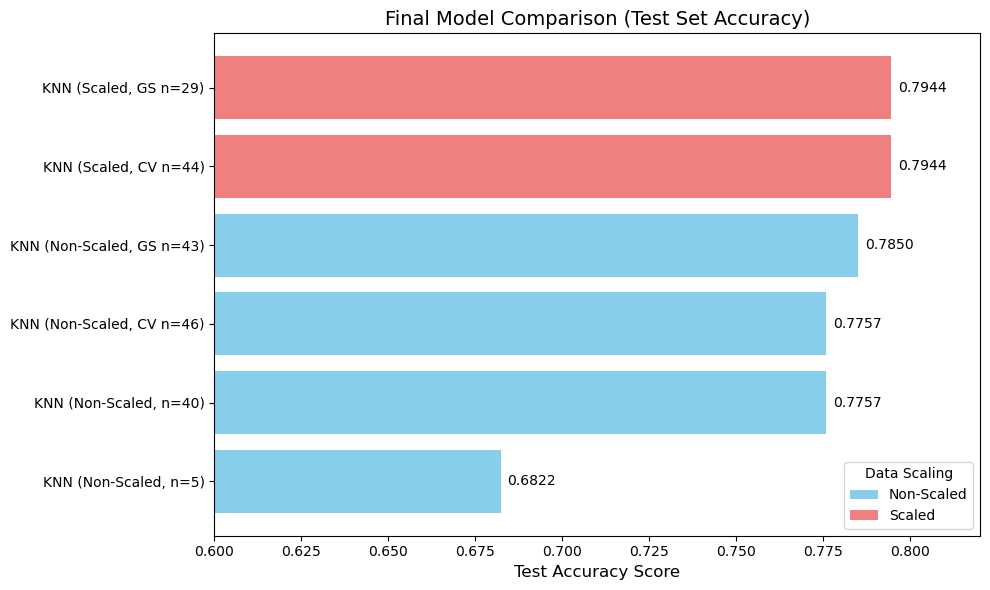

In [28]:
#시각화... gemini가 만들어줌..

import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 정의 (변수명 및 키 수정)
model_data = {
    'model': [{
        'KNN (Non-Scaled, n=5)' : 0.6822,
        'KNN (Non-Scaled, n=40)': 0.7757, 
        'KNN (Non-Scaled, CV n=46)': 0.7757, 
        'KNN (Non-Scaled, GS n=43)': 0.7850,
        'KNN (Scaled, CV n=44)': 0.7944,
        'KNN (Scaled, GS n=29)': 0.7944
    }]
}

# 2. 막대 그래프에 사용할 데이터 추출 및 정렬
# 데이터는 리스트의 0번째 요소에 있는 딕셔너리입니다.
performance_dict = model_data['model'][0]

# 점수를 기준으로 내림차순 정렬을 위해 zip 사용
sorted_items = sorted(performance_dict.items(), key=lambda item: item[1], reverse=False)

# 정렬된 설정 이름 (Y축)과 점수 (X축/Width) 추출
configurations = [item[0] for item in sorted_items]
scores = [item[1] for item in sorted_items]

# 3. 데이터 Scaling Type에 따른 색상 리스트 생성 (이전 시각화 재현)
colors = ['skyblue'] * 4 + ['lightcoral'] * 2 # 정렬된 순서에 맞춰 색상 지정

plt.figure(figsize=(10, 6))

# 4. 수평 막대 그래프 (plt.barh) 그리기
# plt.barh(y축 위치, 막대 길이)
bars = plt.barh(configurations, scores, color=colors) 

# 5. 그래프 꾸미기 (요청 내용 반영 및 점수 텍스트 추가)
plt.title('Final Model Comparison (Test Set Accuracy)', fontsize=14)
plt.xlabel('Test Accuracy Score', fontsize=12)
plt.xlim(0.6, 0.82)

# 막대에 점수 텍스트 추가
for bar in bars:
    plt.text(
        bar.get_width() + 0.002,
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.4f}',
        va='center'
    )

# 6. 범례 수동 생성 (Matplotlib은 barh의 색상 매핑을 자동으로 범례에 추가하지 않으므로 수동 처리)
legend_handles = [plt.Rectangle((0,0), 1, 1, fc='skyblue'), plt.Rectangle((0,0), 1, 1, fc='lightcoral')]
plt.legend(legend_handles, ['Non-Scaled', 'Scaled'], title='Data Scaling', loc='lower right')

plt.tight_layout()
plt.show()